# Sarita - DSWDEOB 26082022

# Dimension Reduction

## Data Collection

Data: 
   The details are obtained from the wine manufacturer.

Data Dictionary:
- Dataset contains 178 data of wine
- 14 features are recorded for each wine

Description:
- Type             Type of wine
-   Alcohol        Quantity of Alcohol
-   Malic          Quantity of malic acid
-  Ash             Quantity of ash
-   Alcalinity      AlkLINITY IN WINE
-   Magnesium        Quantity of magnesium in wine
-  Phenols          Quantity of phenols in wine
-   Flavanoids       Quantity of Flavanoids in wine
-  Nonflavanoids    Quantity of NonFlavanoids in wine
-  Proanthocyanins  Quantity of Proanthocyanins in wine
-  Color            color of wine
-  Hue              a particular shade of wine
-  Dilution         how much diluted
-  Proline          Quantity of proline in wine

#### Install the required packages if not available

In [1]:
!pip install feature_engine
!pip install dtale

**Importing required packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.decomposition import PCA
from kneed import KneeLocator

### Suppress the Warnings

In [3]:
import warnings
warnings.filterwarnings("ignore")

**Import the data**

In [4]:
df = pd.read_csv(r"C:\Users\Ajay Nandal\Downloads\Datasets_PCA_Problem Statement\wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


# EXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS

***Descriptive Statistics and Data Distribution Function***

In [6]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Data Preprocessing

In [7]:
# Drop the unwanted features
df1 = df.drop(["Type"], axis = 1)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


## Checking Null Values

In [9]:
df1.isnull().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

### PCA can be implemented only on Numeric features

In [10]:
numeric_features = df1.select_dtypes(exclude = ['object']).columns

In [11]:
numeric_features

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

## Define the Pipeline steps

#### Define PCA model

In [12]:
pca = PCA(n_components = 6)

## Make Pipeline

**By using mean imputation, null values can be imputed**

**Data has to be standardized to address the scale difference**

In [13]:
num_pipeline = make_pipeline(SimpleImputer(strategy = 'mean'), StandardScaler(), pca)

In [14]:
# Pass the raw data through pipeline

processed = num_pipeline.fit(df1[numeric_features]) 

In [15]:
processed

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=6))])

In [17]:
# Apply the pipeline on the dataset
wine = pd.DataFrame(processed.transform(df1[numeric_features]))

wine

,0,1,2,3,4,5
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520
...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783


## Save the End to End PCA pipeline with Imputation and Standardization

In [18]:
import joblib

joblib.dump(processed, 'Data_prep_DimRed')

['Data_prep_DimRed']

In [19]:
import os 
os.getcwd()

'C:\\Users\\Ajay Nandal'

## Import the pipeline

In [20]:
model = joblib.load("Data_prep_DimRed")

In [21]:
model

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=6))])

## Apply the saved model on to the Dataset to extract PCA values

In [22]:
pca_res = pd.DataFrame(model.transform(df1[numeric_features]))

pca_res

,0,1,2,3,4,5
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520
...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783


In [23]:
# PCA weights

model['pca'].components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [24]:
# Take a closer look at the components
components = pd.DataFrame(model['pca'].components_, columns = numeric_features).T
components.columns = ['pc0', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5']

components

,pc0,pc1,pc2,pc3,pc4,pc5
Alcohol,0.144329,-0.483652,-0.207383,-0.017856,-0.265664,-0.213539
Malic,-0.245188,-0.224931,0.089013,0.536890,0.035214,-0.536814
Ash,-0.002051,-0.316069,0.626224,-0.214176,-0.143025,-0.154475
Alcalinity,-0.239320,0.010591,0.612080,0.060859,0.066103,0.100825
Magnesium,0.141992,-0.299634,0.130757,-0.351797,0.727049,-0.038144
Phenols,0.394661,-0.065040,0.146179,0.198068,-0.149318,0.084122
Flavanoids,0.422934,0.003360,0.150682,0.152295,-0.109026,0.018920
Nonflavanoids,-0.298533,-0.028779,0.170368,-0.203301,-0.500703,0.258594
Proanthocyanins,0.313429,-0.039302,0.149454,0.399057,0.136860,0.533795
Color,-0.088617,-0.529996,-0.137306,0.065926,-0.076437,0.418644


In [25]:
print(model['pca'].explained_variance_ratio_)

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823]


In [26]:
var1 = np.cumsum(model['pca'].explained_variance_ratio_)

print(var1)

[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116]


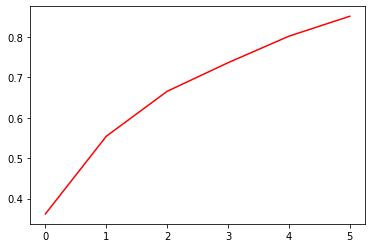

In [27]:
# Variance plot for PCA components obtained 
plt.plot(var1, color = "red")

## KneeLocator
Refer the link to understand the parameters used: https://kneed.readthedocs.io/en/stable/parameters.html    


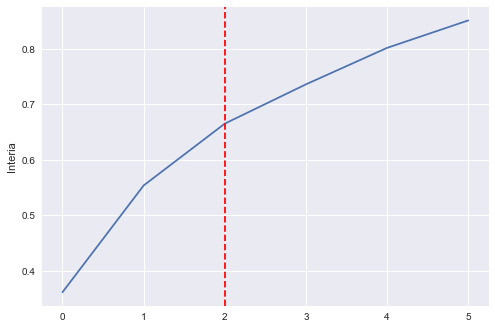

In [28]:
# from kneed import KneeLocator
kl = KneeLocator(range(len(var1)), var1, curve = 'concave', direction = "increasing") 
# The line is pretty linear hence Kneelocator is not able to detect the knee/elbow appropriately
kl.elbow
plt.style.use("seaborn")
plt.plot(range(len(var1)), var1)
plt.xticks(range(len(var1)))
plt.ylabel("Interia")
plt.axvline(x = kl.elbow, color = 'r', label = 'axvline - full height', ls = '--')
plt.show()

Kneelocator recommends 2 PCs as the ideal number of features to be considered

# PCA for Feature Extraction

In [31]:
# Final dataset with manageable number of columns (Feature Extraction)

final = pd.concat([df.Alcohol, pca_res.iloc[:, 0:2]], axis = 1)
final.columns = ['Alcohol', 'pc0', 'pc1']
final

,Alcohol,pc0,pc1
0,14.23,3.316751,-1.443463
1,13.20,2.209465,0.333393
2,13.16,2.516740,-1.031151
3,14.37,3.757066,-2.756372
4,13.24,1.008908,-0.869831
...,...,...,...
173,13.71,-3.370524,-2.216289
174,13.40,-2.601956,-1.757229
175,13.27,-2.677839,-2.760899
176,13.17,-2.387017,-2.297347


0      Text(3.316750812214779, -1.4434626343180088, '...
1      Text(2.209464916918849, 0.3333928870803017, '1...
2      Text(2.5167401466103834, -1.03115129627432, '1...
3      Text(3.7570656097732087, -2.7563719137107126, ...
4      Text(1.008908493795716, -0.8698308214172065, '...
                             ...                        
173    Text(-3.3705241454428614, -2.216289139861137, ...
174    Text(-2.6019558512247376, -1.7572293509792758,...
175    Text(-2.6778394608645018, -2.7608991316745466,...
176    Text(-2.3870170912797186, -2.2973466797128195,...
177    Text(-3.208758164198022, -2.768919566047576, '...
Length: 178, dtype: object

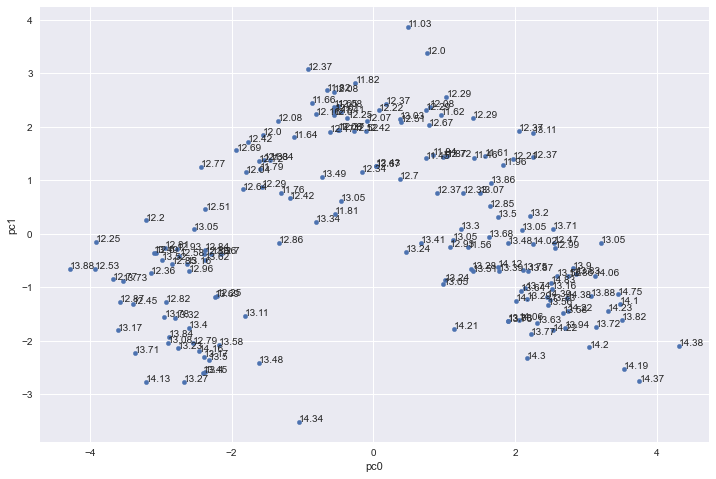

In [32]:
# Scatter diagram
ax = final.plot(x = 'pc0', y = 'pc1', kind = 'scatter', figsize = (12, 8))
final[['pc0', 'pc1', 'Alcohol']].apply(lambda x: ax.text(*x), axis = 1)

# Prediction on new data

In [33]:
newdf = pd.read_excel(r"C:\Users\Ajay Nandal\Downloads\University_Clustering\new_Univ_4_pred.xlsx")

newdf

,UnivID,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,26,UWashington,NY,1280.0,83.0,33.0,13.0,21864.0,90.0
1,27,UCalifornia,CA,1340.0,89.0,23.0,10.0,32162.0,95.0
2,28,Santa Barbara,NC,1315.0,90.0,30.0,NaN,31585.0,95.0
3,29,UMaryland,DC,NaN,74.0,24.0,12.0,20126.0,92.0
4,30,Rice University,MA,1400.0,91.0,NaN,11.0,39525.0,NaN
5,31,UMiami,MD,1305.0,75.0,44.0,7.0,58691.0,87.0
6,32,UVirginia,MA,1380.0,NaN,30.0,10.0,34870.0,91.0
7,33,Indiana University Kokomo,IL,1260.0,85.0,39.0,11.0,NaN,89.0
8,34,University at Buffalo,IN,1255.0,81.0,42.0,13.0,15122.0,94.0


In [37]:
# Drop the unwanted features
#newdf1 = newdf.drop(["UnivID"], axis = 1)

In [38]:
#num_feat = newdf1.select_dtypes(exclude = ['object']).columns

In [39]:
#new_res = pd.DataFrame(model.transform(newdf1[numeric_features]))

#new_res